In [29]:
import pandas as pd
dataSet= pd.read_csv("biodegradable_a.csv", sep=",")

In [30]:
from sklearn.impute import KNNImputer
# Escolhemos 5 vizinhos de modo a obter uma valor médio para cada valor em falta 
# ou seja nem muito adaptado aos dados (overfitting) nem muito suave (underfitting)
imputer = KNNImputer(n_neighbors=5, weights="uniform");
badColumns = dataSet.columns[dataSet.isnull().any()];
dataSet[badColumns] = imputer.fit_transform(dataSet[badColumns]);

Categorizar a variável Biodegradable em binário.

In [31]:
binario = pd.get_dummies(dataSet, columns=['Biodegradable'], prefix=['Biodegradable']);
dataSet = pd.concat([dataSet, binario['Biodegradable_RB']], axis=1)
dataSet = dataSet.drop('Biodegradable', axis=1)
dataSet['Biodegradable_RB'] = dataSet['Biodegradable_RB'].astype(int)

### Scaling data... To see wich is the best scaler



In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler
# Método retirado do notebook: EC_TP04.ipynb -> 2022/2023
# Este método imprime um conjunto de estatísticas sobre um determinado modelo treinado e as suas previsoes.
def printClassResults(truth, preds,toPrint = True,matrix = True):
    if(toPrint):
        print("The Accuracy is: %7.4f" % accuracy_score(truth, preds),end="\t")
        print("The Precision is: %7.4f" % precision_score(truth, preds),end="\t")
        print("The Recall is: %7.4f" % recall_score(truth, preds),end="\t")
        print("The F1 score is: %7.4f" % f1_score(truth, preds),end="\t")
        print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(truth, preds),end="\n")
        
        if(matrix):
            print("Esta é a Matriz Confusão: ")
            print(pd.DataFrame(confusion_matrix(truth, preds)))
    return [accuracy_score(truth, preds),precision_score(truth, preds),recall_score(truth, preds),
            f1_score(truth, preds),matthews_corrcoef(truth, preds)]
scalers = {
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler()
}
def testScalers(scalers, model, results,Xtrain,Xtest,Ytrain,Ytest,toPrint = True,matrixB = True):
    ret= []
    for scaler_name, scaler in scalers.items():
        X_train_scaled = scaler.fit_transform(Xtrain)
        X_test_scaled = scaler.transform(Xtest)
        model.fit(X_train_scaled, Ytrain)
        Ypred = model.predict(X_test_scaled)
        accuracy = accuracy_score(Ytest, Ypred)
        results[scaler_name] = accuracy
        if(toPrint):
            print("Scaler: ",scaler_name);
        ret = printClassResults(Ytest,Ypred, toPrint,matrixB);
        if(toPrint):
            print()
    return ret
def scaleData(scaler,Xtrain,Xtest):
    X_train_scaled = scaler.fit_transform(Xtrain)
    X_test_scaled = scaler.transform(Xtest)
    return X_train_scaled, X_test_scaled

##### Logistic Regression:

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = dataSet.drop('Biodegradable_RB', axis=1)
y = dataSet['Biodegradable_RB'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
results = {}
testScalers(scalers,LogisticRegression(max_iter=1000,random_state=0),results,X_train,X_test,y_train,y_test,True,False);

Scaler:  StandardScaler
The Accuracy is:  0.9608	The Precision is:  0.9634	The Recall is:  0.9914	The F1 score is:  0.9772	The Matthews correlation coefficient is:  0.8441

Scaler:  RobustScaler
The Accuracy is:  0.9575	The Precision is:  0.9611	The Recall is:  0.9898	The F1 score is:  0.9753	The Matthews correlation coefficient is:  0.8304

Scaler:  MinMaxScaler
The Accuracy is:  0.9416	The Precision is:  0.9425	The Recall is:  0.9914	The F1 score is:  0.9663	The Matthews correlation coefficient is:  0.7612



Tendo em conta os resultados para o Logistic Regression temos que o **Standart Scaler** obteve melhores resultados

#### Decision Trees:

In [34]:
from sklearn.tree import DecisionTreeClassifier
X = dataSet.drop('Biodegradable_RB', axis=1)
y = dataSet['Biodegradable_RB'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
results = {}
testScalers(scalers,DecisionTreeClassifier(),results,X_train,X_test,y_train,y_test,True,False);

Scaler:  StandardScaler
The Accuracy is:  0.9615	The Precision is:  0.9765	The Recall is:  0.9780	The F1 score is:  0.9773	The Matthews correlation coefficient is:  0.8523

Scaler:  RobustScaler
The Accuracy is:  0.9562	The Precision is:  0.9719	The Recall is:  0.9765	The F1 score is:  0.9742	The Matthews correlation coefficient is:  0.8308

Scaler:  MinMaxScaler
The Accuracy is:  0.9549	The Precision is:  0.9733	The Recall is:  0.9733	The F1 score is:  0.9733	The Matthews correlation coefficient is:  0.8274



Tendo em conta os resultados para as Decision Trees temos que o **Robust Scaler** obteve melhores resultados

#### Random Forests:

In [35]:
from sklearn.ensemble import RandomForestClassifier
X = dataSet.drop('Biodegradable_RB', axis=1)
y = dataSet['Biodegradable_RB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
results = {}
testScalers(scalers,RandomForestClassifier(),results,X_train,X_test,y_train,y_test,True,False);

Scaler:  StandardScaler
The Accuracy is:  0.9721	The Precision is:  0.9790	The Recall is:  0.9882	The F1 score is:  0.9836	The Matthews correlation coefficient is:  0.8915

Scaler:  RobustScaler
The Accuracy is:  0.9715	The Precision is:  0.9790	The Recall is:  0.9874	The F1 score is:  0.9832	The Matthews correlation coefficient is:  0.8891

Scaler:  MinMaxScaler
The Accuracy is:  0.9735	The Precision is:  0.9813	The Recall is:  0.9874	The F1 score is:  0.9844	The Matthews correlation coefficient is:  0.8972



Tendo em conta os resultados para o Random Forests temos que o **MinMaxScaler** obteve melhores resultados

#### SVM:

In [36]:
from sklearn.svm import SVC
X = dataSet.drop('Biodegradable_RB', axis=1)
y = dataSet['Biodegradable_RB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
results = {}
testScalers(scalers,SVC(),results,X_train,X_test,y_train,y_test,True,False);

Scaler:  StandardScaler
The Accuracy is:  0.9688	The Precision is:  0.9716	The Recall is:  0.9922	The F1 score is:  0.9817	The Matthews correlation coefficient is:  0.8770

Scaler:  RobustScaler
The Accuracy is:  0.9608	The Precision is:  0.9620	The Recall is:  0.9929	The F1 score is:  0.9772	The Matthews correlation coefficient is:  0.8440

Scaler:  MinMaxScaler
The Accuracy is:  0.9502	The Precision is:  0.9531	The Recall is:  0.9898	The F1 score is:  0.9711	The Matthews correlation coefficient is:  0.7992



#### Tendo em conta que em todos os testes usando 4 modelos diferentes, o StandartScaler obteve os melhores resultados em 3 dos 4 testes deve ser utilizado o método de scaling : **StandartScaler**

### Identificar e remover colunas irrelevantes

#### Usar o Correlation selection method para remover variáveis irrelavantes:

Tendo em conta a correlacao das features em relacao a variavel alvo  temos o seguinte grafico:


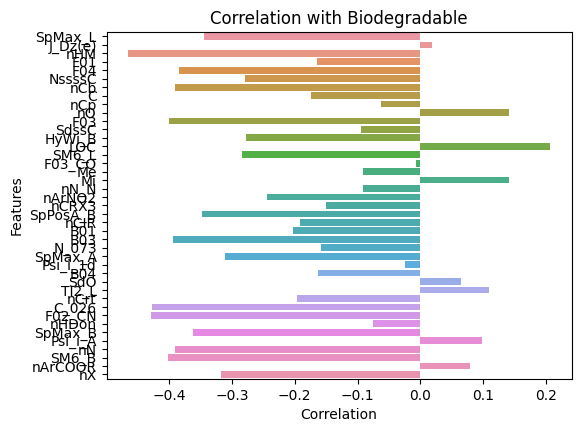

In [37]:
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score, confusion_matrix,matthews_corrcoef, precision_score, recall_score
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Tendo em conta a correlacao das features em relacao a variavel alvo  temos o seguinte grafico:")
biodegradable_corr = dataSet.corr()['Biodegradable_RB'].drop('Biodegradable_RB')
plt.figure(figsize=(6, 4.5))
sns.barplot(x=biodegradable_corr, y=biodegradable_corr.index)
plt.title('Correlation with Biodegradable')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

Como podemos ver pelo gráfico existem muitas features que praticamente nao são relevantes para a previsao da variavel Biodegradable ( a nossa variavel alvo) por este motivo é que devemos reduzir o numero de colunas para obeter somente as que são relevantes , reduzindo a dimensionalidade, o que vai ser muito importante para a performance dos nossos modelos e até logo a seguir quando formos avaliar quais são as features mais importantes.

### Portanto vamos agora remover as variaveis irrelevantes e perceber que ganhos de accuracy obtivemos com esta diminuicao das features a avaliar:

In [38]:
X = dataSet.drop('Biodegradable_RB', axis=1)
y = dataSet['Biodegradable_RB']
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
results = {}
# Obter as stats antes da remocao das irrelevantes
print("Teste com * TODAS * as variáveis:")
testScalers({'StandartScaler':StandardScaler()},RandomForestClassifier(),results,X_train,X_test,y_train,y_test,True,False);
N,M=Xtrain_scaled.shape
N,M
v=np.hstack((y_train.values.reshape((N,1)), Xtrain_scaled))
corr_data = pd.DataFrame(np.corrcoef(v.T))
first_column = corr_data.iloc[:, 0]
positive = True
counter=1;
selColIndexs = []
while positive and counter<len(first_column):
    value = first_column.iloc[counter];
    if(value>0.05 or value<-0.3):
        selColIndexs.append(counter-1);
    counter+=1        
# indices (já sem a coluna adicionada da variavel alvo) com as features que nao foram removidas - ou seja as relevantes;
selColIndexs.append(dataSet.shape[1]-1);
#Apartir de agora este é o novo DataSet contendo apenas as colunas relevantes
smallDataSet = dataSet.iloc[:,selColIndexs];
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y = smallDataSet['Biodegradable_RB']
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
#Numero de variaveis removidas de maneira a reduzir a dimensionalidade
print("Foram removidas",len(first_column) - len(selColIndexs),"features de modo a diminuir a dimensionalidade dos dados");
print("\n\nTeste após * SEREM REMOVIDAS AS VARIAVEIS IRRELEVANTES *");
testScalers({'StandartScaler':StandardScaler()},RandomForestClassifier(),results,X_train,X_test,y_train,y_test,True,False);
smallDataSet;

Teste com * TODAS * as variáveis:
Scaler:  StandartScaler
The Accuracy is:  0.9728	The Precision is:  0.9798	The Recall is:  0.9882	The F1 score is:  0.9840	The Matthews correlation coefficient is:  0.8942

Foram removidas 20 features de modo a diminuir a dimensionalidade dos dados


Teste após * SEREM REMOVIDAS AS VARIAVEIS IRRELEVANTES *
Scaler:  StandartScaler
The Accuracy is:  0.9728	The Precision is:  0.9761	The Recall is:  0.9922	The F1 score is:  0.9840	The Matthews correlation coefficient is:  0.8933



Desta maneira acabámos por reduzir a dimensionalidade dos dados, eliminando cerca de 20 colunas irrelevantes e ainda acabámos por melhorar um pouco a accuracy de previsão usando uma RandomForest e escalando os dados com StandartScaler

Podemos ver que agora temos o seguinte gráfico:


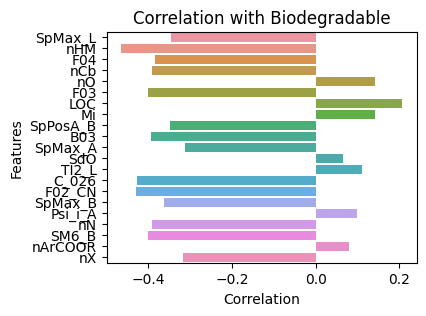

In [39]:
biodegradable_corr = smallDataSet.corr()['Biodegradable_RB'].drop('Biodegradable_RB')
plt.figure(figsize=(4, 3))
sns.barplot(x=biodegradable_corr, y=biodegradable_corr.index)
plt.title('Correlation with Biodegradable')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

## Para perceber quais as features mais importantes dentro das features relevantes que obtivemos vamos utilizar o Stepwise Feature selection para selecionar 6 features mais importantes.

#### Using Stepwise Feature selection method :


In [40]:
#ESTE PASSO COSTUMA DEMORAR CERCA DE 2 MIN A EXECUTAR !!
# Vamos tentar descobrir quais as 5 variáveis mais relevantes usando o Stepwise Feature selection, depois de terem sido removidas
# as colunas irrelevantes usando a correlação.
from sklearn.feature_selection import SequentialFeatureSelector
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y =smallDataSet['Biodegradable_RB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)
N,M=Xtrain_scaled.shape
clf = RandomForestClassifier()
sfs = SequentialFeatureSelector(clf, n_features_to_select=6)
sfs.fit(Xtrain_scaled, y_train)
features=sfs.get_support()
features_selected = X.columns[features].values

The 6 features selected are columns:  ['nHM' 'nCb' 'nO' 'F03' 'Mi' 'F02_CN']


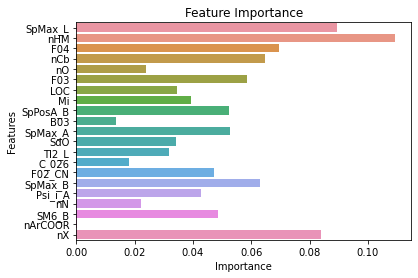

In [ ]:
from sklearn.inspection import permutation_importance
print("The 6 features selected are columns: ", features_selected);
clf.fit(Xtrain_scaled, y_train)
importance = clf.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Tendo em conta os resultados do StepWise ficamos a saber quais sao as 6 features mais importantes.

### Teste dos modelos neste momento :


In [ ]:
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y = smallDataSet['Biodegradable_RB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)
results = {}
lrS = testScalers({'StandartScaler':StandardScaler()},LogisticRegression(),results,Xtrain_scaled,Xtest_scaled,y_train,y_test,False);
dtS=testScalers({'StandartScaler':StandardScaler()},RandomForestClassifier(),results,Xtrain_scaled,Xtest_scaled,y_train,y_test,False);
svmS=testScalers({'StandartScaler':StandardScaler()},DecisionTreeClassifier(),results,Xtrain_scaled,Xtest_scaled,y_train,y_test,False);
rfS=testScalers({'StandartScaler':StandardScaler()},SVC(),results,Xtrain_scaled,Xtest_scaled,y_train,y_test,False);
# Criar uma tabela com os dados todos
data = {'Logistic Regression': lrS, 'Decision Trees': dtS, 'SVM': svmS, 'Random Forests': rfS}
df = pd.DataFrame(data)
# Set the index labels
row_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score','MCC']
df.index = row_labels
df

,Logistic Regression,Decision Trees,SVM,Random Forests
Accuracy,0.943597,0.974784,0.944924,0.956868
Precision,0.948679,0.976852,0.966327,0.956916
Recall,0.986656,0.993721,0.968603,0.993721
F1 Score,0.967295,0.985214,0.967464,0.974971
MCC,0.770878,0.901193,0.788223,0.827190


## Model Tuning:

#### Vamos comecar com o exemplo das TPs e testar a ferramenta GridSearchCV ao usar o SVC 


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y = smallDataSet['Biodegradable_RB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)
gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
Cs = [1, 10, 100, 1e3, 1e4, 1e5]
param_grid = {"gamma": gammas, "C": Cs}
clf = SVC()
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring="f1")
gs=gs.fit(X_train, y_train)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(Xtrain_scaled, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


### Com RandomForests : Modelo com melhores scores até agora:

In [ ]:
# Algum deste código foi usado e/ou modificado da página web : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y = smallDataSet['Biodegradable_RB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)
# Define the parameter grid for random search
random_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(Xtrain_scaled, y_train)
print("Best parameters found:")
rfparams = rf_random.best_params_
print(rfparams)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [ ]:
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y = smallDataSet['Biodegradable_RB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)
rfparams['n_estimators'] = int(rfparams['n_estimators'])
rf = RandomForestClassifier(**rfparams)
results = {}
print("TESTE DO MODELO: RANDOM FORESTS - Normal\n")
testScalers({'StandartScaler':StandardScaler()},RandomForestClassifier(),results,Xtrain_scaled,Xtest_scaled,y_train,y_test,True,False);
print("TESTE DO MODELO: RANDOM FORESTS - Tuned com Hiperparametros")
print("Hiperparametros: ",rfparams,"\n")
testScalers({'StandartScaler':StandardScaler()},rf,results,Xtrain_scaled,Xtest_scaled,y_train,y_test,True,False);

TESTE DO MODELO: RANDOM FORESTS - Normal

Scaler:  StandartScaler
The Accuracy is:  0.9741	The Precision is:  0.9776	The Recall is:  0.9922	The F1 score is:  0.9848	The Matthews correlation coefficient is:  0.8987
Esta é a Matriz Confusão: 
     0     1
0  204    29
1   10  1264

TESTE DO MODELO: RANDOM FORESTS - Tuned com Hiperparametros
Hiperparametros:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False} 

Scaler:  StandartScaler
The Accuracy is:  0.9754	The Precision is:  0.9776	The Recall is:  0.9937	The F1 score is:  0.9856	The Matthews correlation coefficient is:  0.9039
Esta é a Matriz Confusão: 
     0     1
0  204    29
1    8  1266



## Construção dos diferentes modelos com os devidos hiperparametros:

In [ ]:
X = smallDataSet.drop('Biodegradable_RB', axis=1)
y = smallDataSet['Biodegradable_RB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
Xtrain_scaled, Xtest_scaled = scaleData(StandardScaler(),X_train,X_test)
results={}

### Regressão Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1','l2'], # L1 ou L2 os dois tipos de regularização
    'C': [0.001,0.1, 1, 10,100],
    'solver': ['liblinear', 'saga'], # teoricamente liblinear deve ser bom para o nosso caso com um dataset mais pequeno
    'max_iter': [10000, 20000, 50000] # numero maximo de iteracoes que o solver pode fazer
}
lr=LogisticRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5,error_score='raise')
grid_search.fit(Xtrain_scaled,y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters found: {'C': 1, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.9348972540461903


In [ ]:
lrParams= grid_search.best_params_
lr = LogisticRegression(**lrParams)
print("TESTE DO MODELO: Regressao Logistica - Tuned com Hiperparametros")
print("Hiperparametros: ",lrParams,"\n")
lrStats= testScalers({'StandartScaler':StandardScaler()},lr,results,Xtrain_scaled,Xtest_scaled,y_train,y_test);

TESTE DO MODELO: Regressao Logistica - Tuned com Hiperparametros
Hiperparametros:  {'C': 1, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'} 

Scaler:  StandartScaler
The Accuracy is:  0.9436	The Precision is:  0.9487	The Recall is:  0.9867	The F1 score is:  0.9673	The Matthews correlation coefficient is:  0.7709
Esta é a Matriz Confusão: 
     0     1
0  165    68
1   17  1257



### Avores de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterio de sepração - entropy é a entropia, e o gini avalia a probabilidade de classificação
                                       # incorreta de uma amostra escolhida ao calhas
    'max_depth': [None, 5, 10, 20], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2']  # Numero de features a ter em conta 
}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5) # usamos k=5 na cross validation pois pelas pesquisas que fiz tende a ser o mais comum
grid_search.fit(Xtrain_scaled, y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters found: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.9381807387439428


In [ ]:
dtParams= grid_search.best_params_
dt = DecisionTreeClassifier(**dtParams)
print("TESTE DO MODELO: Arvores de Decisão - Tuned com Hiperparametros")
print("Hiperparametros: ",dtParams,"\n")
dtStats = testScalers({'StandartScaler':StandardScaler()},dt,results,Xtrain_scaled,Xtest_scaled,y_train,y_test);

TESTE DO MODELO: Arvores de Decisão - Tuned com Hiperparametros
Hiperparametros:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10} 

Scaler:  StandartScaler
The Accuracy is:  0.9443	The Precision is:  0.9685	The Recall is:  0.9655	The F1 score is:  0.9670	The Matthews correlation coefficient is:  0.7883
Esta é a Matriz Confusão: 
     0     1
0  193    40
1   44  1230



### SVM

In [ ]:
# Já tinhamos visto como fazer model tuning no caso do SVM mas aqui vamos só indicar os resultados obtidos
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma': [0.001, 0.01, 0.1, 1, 10],'kernel': ['linear', 'rbf', 'sigmoid']}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5) # usamos k=5 na cross validation pois pelas pesquisas que fiz tende a ser o mais comum
grid_search.fit(Xtrain_scaled, y_train)
print("Best hyperparameters:", grid_search.best_params_)
svmParams= grid_search.best_params_
svm = SVC(**svmParams)
print("TESTE DO MODELO: SVM - Tuned com Hiperparametros")
print("Hiperparametros: ",svmParams,"\n")
svmStats = testScalers({'StandartScaler':StandardScaler()},svm,results,Xtrain_scaled,Xtest_scaled,y_train,y_test);

Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
TESTE DO MODELO: SVM - Tuned com Hiperparametros
Hiperparametros:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 

Scaler:  StandartScaler
The Accuracy is:  0.9715	The Precision is:  0.9760	The Recall is:  0.9906	The F1 score is:  0.9832	The Matthews correlation coefficient is:  0.8882
Esta é a Matriz Confusão: 
     0     1
0  202    31
1   12  1262



### RandomForests

In [ ]:
# Tendo em conta os testes realizados antes temos os seguintes resultados:
rf = RandomForestClassifier(**rfparams)
print("TESTE DO MODELO: RANDOM FORESTS - Tuned com Hiperparametros")
print("Hiperparametros: ",rfparams,"\n")
rfStats = testScalers({'StandartScaler':StandardScaler()},rf,results,Xtrain_scaled,Xtest_scaled,y_train,y_test);

TESTE DO MODELO: RANDOM FORESTS - Tuned com Hiperparametros
Hiperparametros:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False} 

Scaler:  StandartScaler
The Accuracy is:  0.9754	The Precision is:  0.9783	The Recall is:  0.9929	The F1 score is:  0.9856	The Matthews correlation coefficient is:  0.9040
Esta é a Matriz Confusão: 
     0     1
0  205    28
1    9  1265



## Escolha do melhor modelo face aos resultados obtidos:

In [ ]:
# Criar uma tabela com os dados todos
data = {'Logistic Regression': lrStats, 'Decision Trees': dtStats, 'SVM': svmStats, 'Random Forests': rfStats}
df = pd.DataFrame(data)
# Set the index labels
row_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score','MCC']
df.index = row_labels
df

,Logistic Regression,Decision Trees,SVM,Random Forests
Accuracy,0.943597,0.944260,0.971466,0.975448
Precision,0.948679,0.968504,0.976025,0.978345
Recall,0.986656,0.965463,0.990581,0.992936
F1 Score,0.967295,0.966981,0.983249,0.985586
MCC,0.770878,0.788301,0.888194,0.903969


#### Como podemos observar pela tabela, tanto o modelo SVM como o RandomForest conseguiram melhores resultados em todas as métricas




In [ ]:
difStats = np.array(rfStats)-np.array(svmStats)
data = {'SVM': svmStats, 'RF': rfStats, 'RF - SVM': difStats}
df = pd.DataFrame(data)
row_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score','MCC']
df.index = row_labels
df

,SVM,RF,RF - SVM
Accuracy,0.971466,0.975448,0.003981
Precision,0.976025,0.978345,0.002320
Recall,0.990581,0.992936,0.002355
F1 Score,0.983249,0.985586,0.002337
MCC,0.888194,0.903969,0.015775
